<IPython.core.display.Javascript object>


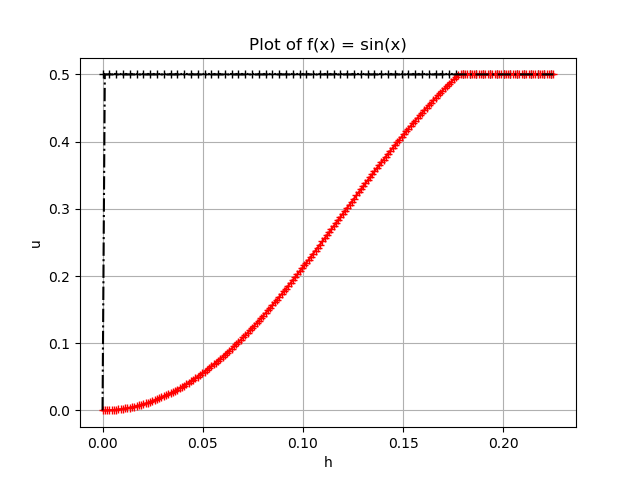

In [1]:
%matplotlib notebook

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

import numpy as np
from matplotlib import pyplot as plt


desing_eps = 0.001
h = np.linspace(0, 150*1.5*desing_eps, 200)
u = np.linspace(0.5, 0.5, 200)
hu = h*u

k = desing_eps**2*0.05
u_desing1 = h*hu/(h**2+k)

t = np.minimum(1.0, h/desing_eps)
u_desing1 = (1-t)*u_desing1+t*u

u_desing1 = np.sqrt(2)*h*hu/np.sqrt(h**4+np.maximum(h**4, desing_eps))
k = desing_eps**4
u_desing2 = np.sqrt(2)*h*hu/np.sqrt(h**4+np.maximum(h**4, k))

fig=plt.figure()
plt.plot(h, u, 'k:+', markevery=3)
plt.plot(h, u_desing1, 'r-+')
plt.plot(h, u_desing2, 'k-.')
plt.xlabel('h')
plt.ylabel('u')
plt.title('Plot of f(x) = sin(x)')
plt.grid(True)
plt.show()




<IPython.core.display.Javascript object>


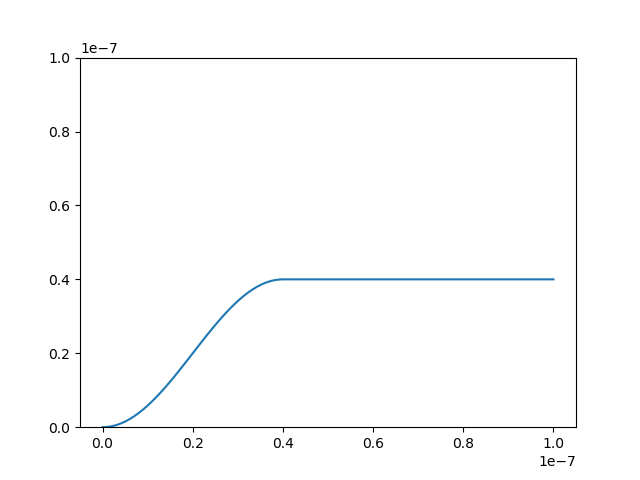

(0, 1e-07)

In [2]:
def desing1(x, eps):
    return np.maximum(x, eps)

def desing2(x, eps):
    t = np.maximum(0.0, np.minimum(1.0, 1.0 - np.abs(x) / eps))
    #return (1.0 -t) * x + t * eps*(0.5 + 0.5*np.cos(np.minimum(t * np.pi, np.pi)))
    return eps*(0.5 - 0.5*np.cos(np.minimum(x / eps * np.pi, np.pi)))
    
eps = np.float32(4.0e-8)
x = np.linspace(0.0, 1e-7, 100)
y = desing2(x, eps)

plt.figure()
plt.plot(x, y)
plt.ylim(0, 1e-7)

<IPython.core.display.Javascript object>


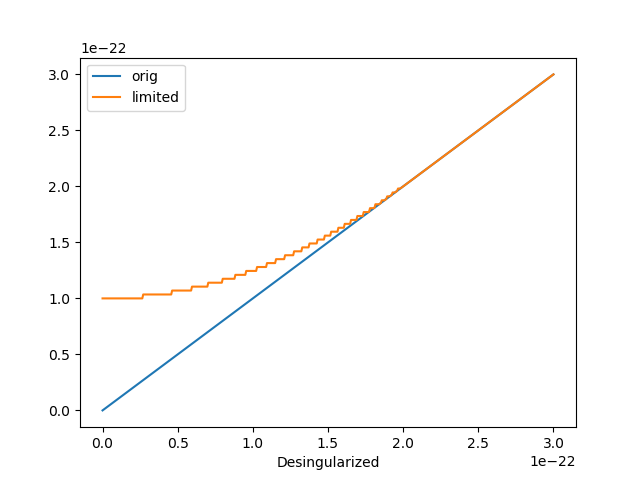

In [29]:
eps = np.float32(2.0e-22)
x = np.linspace(0, 1.5*eps, 500).astype(np.float32)
y = np.maximum(np.minimum(x*x/(np.float32(2.0)*eps)+np.float32(0.5)*eps, eps), x)

plt.figure()
plt.plot(x, x, label='orig')
plt.plot(x, y, label='limited')
plt.xlabel('x')
plt.xlabel('Desingularized')
plt.legend()

<IPython.core.display.Javascript object>


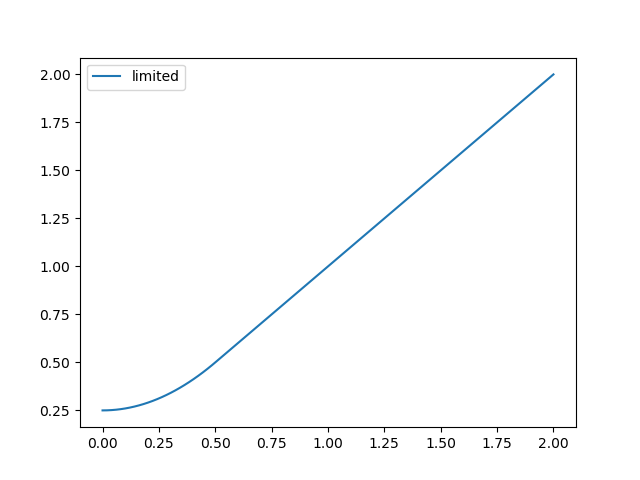

In [4]:
x = np.linspace(0, 2, 100)
y = np.where(x <= 0.5, x*x+0.25, x)
plt.figure()
plt.plot(x, y, label='limited')
plt.legend()

<IPython.core.display.Javascript object>


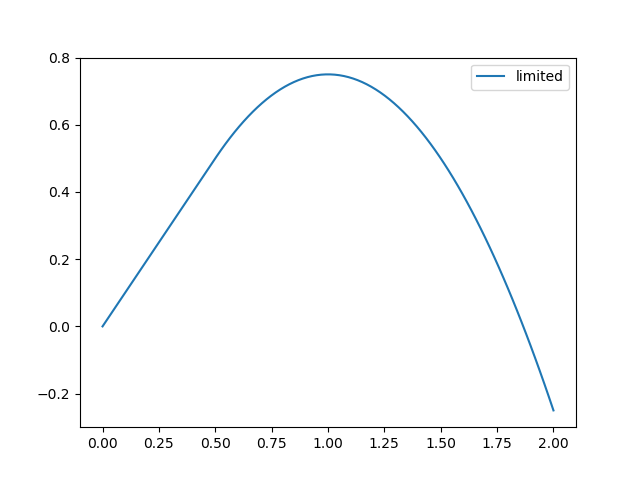

In [5]:
x = np.linspace(0, 2, 100)
y = np.where(x >= 0.5, x-(x-0.5)*(x-0.5), x)
plt.figure()
plt.plot(x, y, label='limited')
plt.legend()